In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## World Analysis

In [2]:
df = pd.read_csv('./Data/world_info.csv')

df.columns = ['Unnamed','Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 
           'Active Cases', 'Critical cases', 'Cases per 1M', 'Deaths per 1M','Date of 1st Case']
df = df.set_index('Country')
df = df.drop(df.columns[[0]], axis=1)

df.drop(df.tail(1).index,inplace=True)        #removes total row
df.head()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical cases,Cases per 1M,Deaths per 1M,Date of 1st Case
Country,,,,,,,,,,
USA,131403,"+7,825",2329.0,+108,4378.0,124696,2948.0,397.0,7.0,Jan 20
Italy,97689,"+5,217",10779.0,+756,13030.0,73880,3906.0,1616.0,178.0,Jan 29
Spain,78799,"+5,564",6606.0,+624,14709.0,57484,4165.0,1685.0,141.0,Jan 30
Germany,60659,"+2,964",482.0,+49,9211.0,50966,1979.0,724.0,6.0,Jan 26
Iran,38309,"+2,901",2640.0,+123,12391.0,23278,3206.0,456.0,31.0,Feb 18


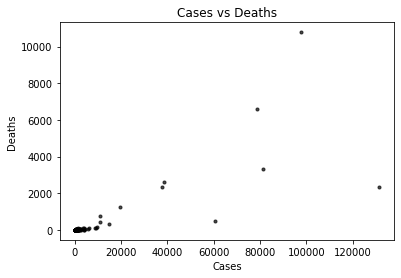

In [3]:
#Plot cases vs deaths on a scatter plot
x = df.loc[:,'Total Cases']
y = df.loc[:,'Total Deaths']
colors = 'black'
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.title('Cases vs Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')

plt.show()

Text(0, 0.5, 'Deaths')

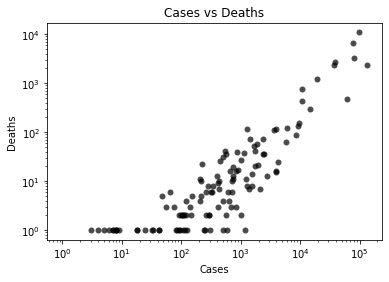

In [4]:
#same scatter plot on log scale
fig = plt.figure()
ax = plt.gca()

ax.plot(x,y, 'o', c='black', alpha=0.7, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Cases vs Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')

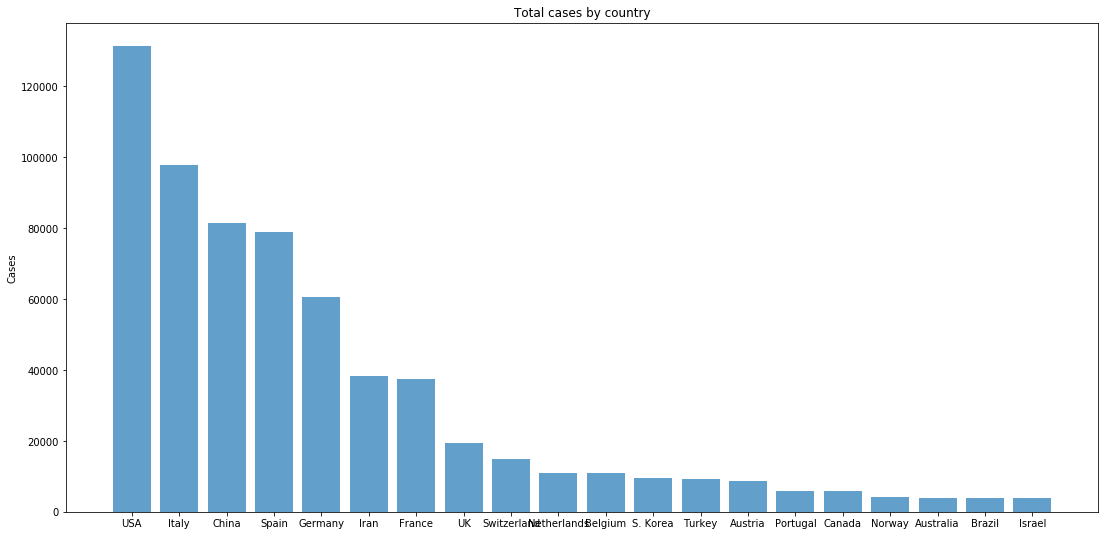

In [5]:
#bar chart of total cases by country
df = df.sort_values(by='Total Cases', ascending=0)
objects = df.index[0:20]
y_pos = np.arange(len(objects))
x = df.iloc[0:20,0]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Cases')
plt.title('Total cases by country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


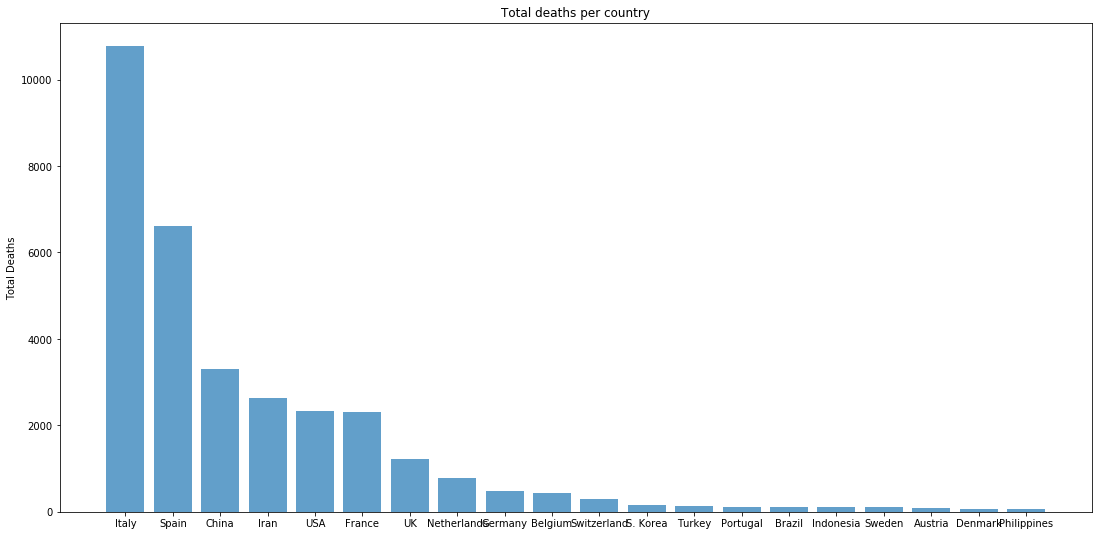

In [6]:
#bar chart of deaths by country
df = df.sort_values(by='Total Deaths', ascending=0)
objects = df.index[0:20]
y_pos = np.arange(len(objects))
x = df.iloc[0:20,2]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Total Deaths')
plt.title('Total deaths per country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


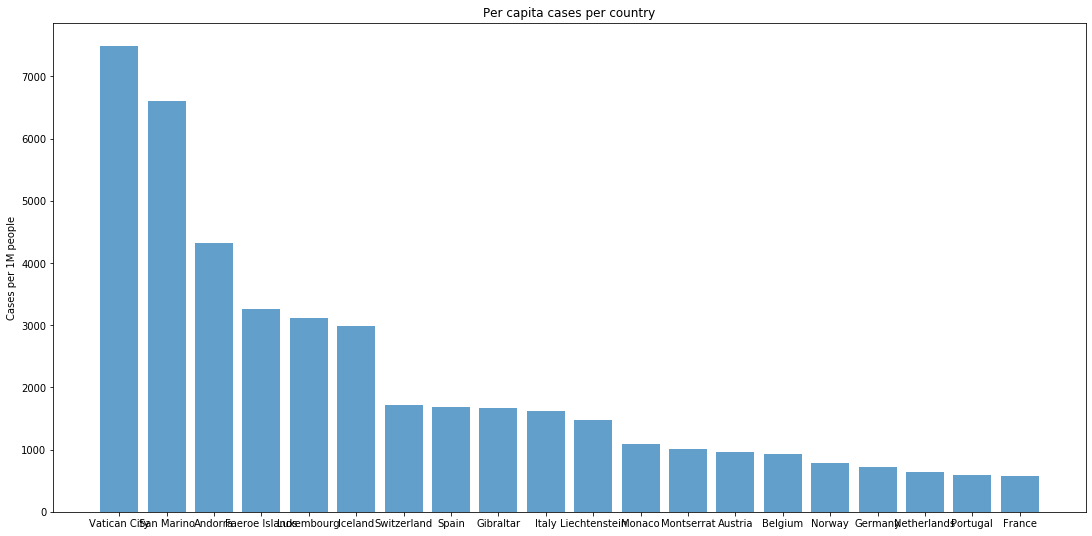

In [7]:
#bar chart of cases per capita
df = df.sort_values(by='Cases per 1M', ascending=0)
objects = df.index[0:20]
y_pos = np.arange(len(objects))
x = df.iloc[0:20,7]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Cases per 1M people')
plt.title('Per capita cases per country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


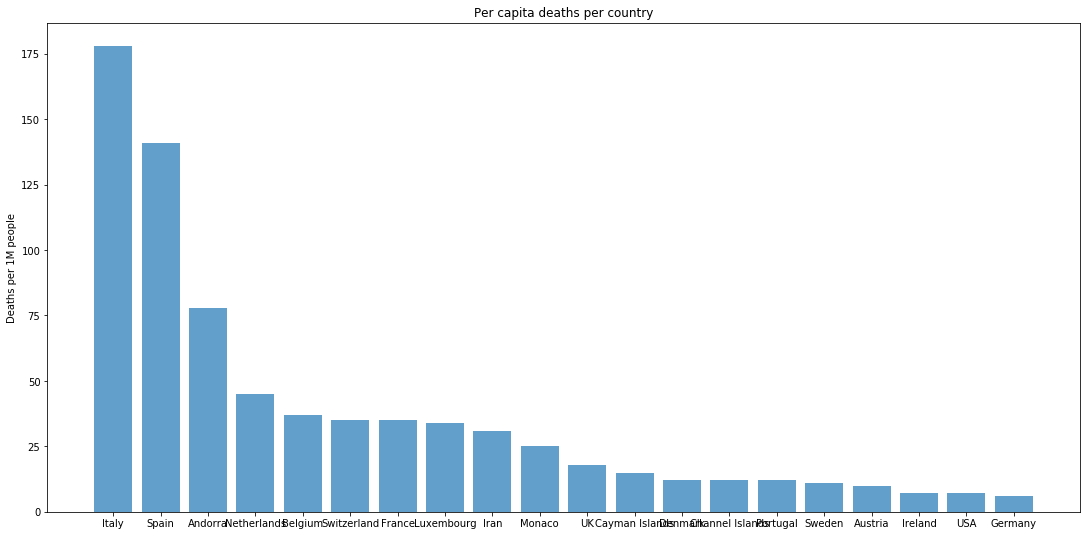

In [8]:
#bar chart of deaths per capita
df = df.sort_values(by='Deaths per 1M', ascending=0)
objects = df.index[1:21]
y_pos = np.arange(len(objects))
x = df.iloc[1:21,8]

plt.bar(y_pos, x, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Deaths per 1M people')
plt.title('Per capita deaths per country')

fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.show()


## Cases Analysis

In [9]:
df_cases = pd.read_csv('./Data/Stats/Cases.csv')

df_cases = df_cases.set_index('Dates')

#df_cases.tail()

In [10]:
#cases over time
x = df_cases.index
germany = df_cases.loc[:,'Germany']
iran = df_cases.loc[:,'Iran']
italy = df_cases.loc[:,'Italy']
spain = df_cases.loc[:,'Spain']
US = df_cases.loc[:,'USA']
UK = df_cases.loc[:,'UK']
france = df_cases.loc[:,'France']
south_korea = df_cases.loc[:,'S. Korea']
australia = df_cases.loc[:,'Australia']
canada = df_cases.loc[:,'Canada']
norway = df_cases.loc[:,'Norway']

fig=plt.figure()
fig.show()
fig.set_size_inches(20, 9)
plt.ylabel('Total Cases')
plt.title('Cases per country over time')
ax=fig.add_subplot(111)

ax.plot(x,germany,c='b',marker="^",ls='--',label='Germany',fillstyle='none')
ax.plot(x,iran,c='g',marker=(8,2,0),ls='--',label='Iran')
ax.plot(x,italy,c='k',marker="^",ls='-',label='Italy')
ax.plot(x,spain,c='r',marker="v",ls='-',label='Spain')
ax.plot(x,US,c='m',marker="o",ls='--',label='US',fillstyle='none')
ax.plot(x,UK,c='k',marker="+",ls=':',label='UK')
ax.plot(x,france,c='g',marker="o",ls=':',label='France')
ax.plot(x,south_korea,c='b',marker="+",ls=':',label='South Korea')
ax.plot(x,australia,c='m',marker=(8,2,0),ls='-',label='Australia')
ax.plot(x,canada,c='k',marker="v",ls='--',label='Canada')
ax.plot(x,norway,c='r',marker=(8,2,0),ls=':',label='Norway')

plt.legend(loc=2)
plt.draw()

KeyError: 'Germany'

In [ ]:
def index_X_cases(df=df_cases,X_cases=200):
    """Produces a dataframe that sets the index to 0 at X cases and removes all preceeding observations"""
    
    # cycle through columns and reset index at X_cases
    country_dfs = []
    for c in df.columns:
        dfc = df[[c]]
        dfc = dfc[dfc[c]>=X_cases]
        dfc.reset_index(drop=True,inplace=True)
        country_dfs.append(dfc)
    return pd.concat(country_dfs,axis=1)
    
# plot index_X_cases 
fig,ax = plt.subplots(figsize=(18.5,9))
X_cases = 200
ax.set_title('Cases starting at {} over time'.format(X_cases))
ax.set_xlabel('Days after {} case numbers reached'.format(X_cases))
ax.set_ylabel('Cases')

index_X_cases(df_cases,X_cases).plot(ax=ax)


# Fit function through data

In [ ]:
# creating case df
df_200_cases = index_X_cases()


In [ ]:
from scipy.optimize import curve_fit


def func(x, a, b, c):
    return a * np.exp(b * x) + c

def projection(df):
    country_dfs = []
    for c in df.columns:
        dfc = df[c]
        x = df.index
        dfc.dropna(inplace=True)
        x_fit = dfc.index
        y = dfc
        
        popt, pcov = curve_fit(func, x_fit, y, p0=[0,0,0], maxfev=5000)
        dfc = pd.DataFrame(data = func(x.difference(x_fit), *popt), index=x.difference(x_fit), columns=['{}_fit'.format(c)])

        country_dfs.append(dfc)
    dfc = pd.concat(country_dfs,axis=1)
    return dfc

In [ ]:
df_200_cases_projection = projection(df_200_cases)
df_200_cases = index_X_cases()
df_200 = pd.concat([df_200_cases,df_200_cases_projection],axis=1)


df_200 = df_200.reset_index()
df_200_l = df_200.melt(id_vars='index')
df_200_l.columns=['days','country','cases']
df_200_l[['country','type']] = df_200_l['country'].str.split('_',expand=True).fillna('act')
#df_200_l

In [ ]:
import plotly.express as px
fig = px.line(df_200_l, x="days", y="cases", color="country", line_group="country", hover_name="country",
         render_mode="svg",log_y=True,line_dash='type')
fig.show()

## Deaths analysis

In [ ]:
df_deaths = pd.read_csv('./Data/Stats/Deaths.csv')

df_deaths = df_deaths.set_index('Dates')

#df_deaths.tail()

In [ ]:
#deaths over time
x = df_deaths.index
germany = df_deaths.loc[:,'Germany']
iran = df_deaths.loc[:,'Iran']
italy = df_deaths.loc[:,'Italy']
spain = df_deaths.loc[:,'Spain']
US = df_deaths.loc[:,'USA']
UK = df_deaths.loc[:,'UK']
france = df_deaths.loc[:,'France']
south_korea = df_deaths.loc[:,'S. Korea']
australia = df_deaths.loc[:,'Australia']
canada = df_deaths.loc[:,'Canada']
norway = df_deaths.loc[:,'Norway']

fig=plt.figure()
fig.show()
fig.set_size_inches(20, 9)
plt.ylabel('Total Deaths')
plt.title('Deaths per country over time')
ax=fig.add_subplot(111)

ax.plot(x,germany,c='b',marker="^",ls='--',label='Germany',fillstyle='none')
ax.plot(x,iran,c='g',marker=(8,2,0),ls='--',label='Iran')
ax.plot(x,italy,c='k',marker="^",ls='-',label='Italy')
ax.plot(x,spain,c='r',marker="v",ls='-',label='Spain')
ax.plot(x,US,c='m',marker="o",ls='--',label='US',fillstyle='none')
ax.plot(x,UK,c='k',marker="+",ls=':',label='UK')
ax.plot(x,france,c='g',marker="o",ls=':',label='France')
ax.plot(x,south_korea,c='b',marker="+",ls=':',label='South Korea')
ax.plot(x,australia,c='m',marker=(8,2,0),ls='-',label='Australia')
ax.plot(x,canada,c='k',marker="v",ls='--',label='Canada')
ax.plot(x,norway,c='r',marker=(8,2,0),ls=':',label='Norway')

plt.legend(loc=2)
plt.draw()

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
X = 5
ax.set_title('Deaths starting at {} over time'.format(X))
ax.set_xlabel('Days after {} deaths reached'.format(X))
ax.set_ylabel('Deaths')
index_X_cases(df_deaths,X).plot(ax=ax)